In [1]:
#Based on https://www.kaggle.com/code/pouyaaskari/spotify-data-analysis-project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_track=pd.read_csv("C:/Users/mstrid/Documents/Website/SpotifyFeatures.csv")
df_track.shape

(228159, 18)

In [3]:
df_track = df_track[df_track['genre'] != 'Comedy']
df_track = df_track[df_track['genre'] != 'Children’s Music']
df_track = df_track[df_track['genre'] != 'Movie']

df_track=df_track[df_track['speechiness'] < 0.889] #everything above this value is speeches

df_track["duration"]=df_track["duration_ms"].apply(lambda x:round(x/(1000))) #converts ms to s
df_track.drop("duration_ms",inplace=True,axis=1) #drop the ms axis.

df_track.drop(df_track[df_track['duration'] > 480].index, inplace = True)
df_track.drop(df_track[df_track['duration'] < 45].index, inplace = True)
#any entry that is longer than 8 minutes probably isn't a song. 
#any entry that isn't at least 45 seconds is probably a youtube short

In [4]:
#normalizing columns
df_track["duration"]=df_track["duration"].apply(lambda x:(x/(480))) #normalizes
#df_track["popularity"] = df_track["popularity"].apply(lambda x:(x/(100))) #normalizes so that data is between 0 and 1
df_track["tempo"] = df_track["tempo"].apply(lambda x:(x/(239.848))) #normalizes so that data is between 0 and 1
#239.848 is the max value in the tempo column

In [5]:
#dropping unnecessary columns
df_track.drop("time_signature",inplace=True,axis=1)
df_track.drop("mode",inplace=True,axis=1)
df_track.drop("key",inplace=True,axis=1)
df_track.drop("popularity",inplace=True,axis=1) #popularity should have nothing to do with music recommenders

#drops rows with the same songs
df_track = df_track.drop_duplicates(subset=['track_name','artist_name'], keep='first')

In [6]:
#converting decibel reading to a 0 to 100 scale
#https://stackoverflow.com/questions/929103/convert-a-number-range-to-another-range-maintaining-ratio
old_min = -52.457 #min loudness in db
old_max = 1.585 #max loudness in db
new_min = 0
new_max = 1

df_track["loudness"] = df_track["loudness"].apply(lambda old_value:( ( (old_value - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min  )   )

In [7]:
df_track.shape

(132223, 14)

In [8]:
df_track.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
duration            0
dtype: int64

In [9]:
df_track.head()

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,0.972,0.360,0.20100,0.0280,0.133,0.604400,0.0581,0.549506,0.3690,0.368750
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,0.935,0.168,0.47000,0.0204,0.363,0.814959,0.0383,0.313223,0.0696,0.554167
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,0.961,0.250,0.00605,0.0000,0.120,0.351893,0.0480,0.318923,0.0380,0.602083
5,Opera,Giuseppe Verdi,D'amor sull'ali rosee,0G75cCcf6vBSnMFFkVW9pq,0.990,0.211,0.06400,0.0196,0.073,0.588265,0.0534,0.339394,0.0400,0.697917
8,Opera,Vincenzo Bellini,I puritani: Ah! per sempre io ti perdei - Bel ...,297JkKwa74ayxAz38hXMeb,0.951,0.169,0.17800,0.1850,0.665,0.571185,0.0540,0.275153,0.1120,0.870833


In [10]:
df_track.shape

(132223, 14)

In [11]:
least_energetic=df_track[df_track["energy"] < .358].sort_values(by="energy")
least_energetic

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
87686,Classical,Jóhann Jóhannsson,Fragment I,3CJvAhtvsP5UyGo2nGXG9J,0.9650,0.1210,0.000020,0.916000,0.111,0.191314,0.0982,0.403114,0.0000,0.177083
194254,Soundtrack,Max Richter,Space 21 (petrichor),5bpmEsR82Yg8x82zNQ9MDD,0.8640,0.0937,0.000234,0.923000,0.132,0.261093,0.0535,0.300861,0.0352,0.600000
194867,Soundtrack,Gustavo Santaolalla,Forgotten Memories,4TVtXw28cKW0qT8aNM2ODh,0.9910,0.1780,0.000243,0.000031,0.107,0.277913,0.0422,0.279731,0.5830,0.141667
114225,Hip-Hop,$uicideBoy$,Kill Yourself - Part II,3wToo6EYyTjqsC0cyrHdkV,0.3750,0.6030,0.000243,0.083700,0.130,0.785056,0.3320,0.892757,0.6660,0.929167
227970,Soundtrack,Max Richter,Space 26 (epicardium) - Pt. 1,6LhozHCaYhCVyRfA1KXez8,0.8220,0.1250,0.000259,0.871000,0.112,0.287739,0.0595,0.606013,0.0358,0.425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201713,World,Hillsong Worship,Touch Of Heaven - Instrumental Version,532yLhTO3WS92NTVu5tr35,0.0606,0.4580,0.357000,0.843000,0.265,0.770271,0.0298,0.562719,0.0378,0.925000
47782,Electronic,Nightmares On Wax,Nights Interlude,1YaytGS416RQtrGh6HDqAU,0.1370,0.4940,0.357000,0.667000,0.131,0.654935,0.0343,0.396213,0.2920,0.427083
167958,Rock,Bee Gees,How Deep Is Your Love,2JoZzpdeP2G6Csfdq5aLXP,0.1050,0.6330,0.357000,0.000000,0.133,0.797361,0.0264,0.437519,0.6740,0.510417
137922,Ska,Toh Kay,A Moment of Silence,145uIp5PG717oeprQIt86m,0.9320,0.5760,0.357000,0.001950,0.106,0.750842,0.0355,0.556561,0.4670,0.545833


In [12]:
most_energetic=df_track[df_track["energy"]  > .785].sort_values(by="energy")
most_energetic

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
25461,Blues,Dabrye,First Law of Nature Rock Day (feat. Denmark Ve...,7Fgau8g1vPWm9cIVcG3JU9,0.399000,0.756,0.786,0.000111,0.0976,0.808205,0.2810,0.391923,0.793,0.443750
30770,Pop,Mobb Deep,"Shook Ones, Pt. II",33ZXjLCpiINn8eQIDYEPTD,0.014600,0.763,0.786,0.011400,0.0817,0.850912,0.2290,0.391319,0.504,0.679167
175795,Soundtrack,Hans Zimmer,"The Good, The Bad And The Ugly - Polka Version",1rejJKdqCK2Y8yWiHDUtLW,0.255000,0.405,0.786,0.003830,0.1440,0.852541,0.0901,0.338627,0.552,0.112500
1578,Dance,Belinda Carlisle,Heaven Is A Place On Earth,58mFu3oIpBa0HLNeJIxsw3,0.035000,0.637,0.786,0.000003,0.0490,0.782077,0.0324,0.512291,0.804,0.514583
134131,Reggae,The Expendables,Anti Social,6tXG8BcZHPvcMBYf4LO9EL,0.050200,0.489,0.786,0.000031,0.1360,0.856778,0.0314,0.354454,0.629,0.420833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18495,Dance,2 Unlimited,No Limit,7pSJmBTlbA4S5zSLsj6Pzz,0.010900,0.652,0.999,0.000646,0.0533,0.847452,0.0522,0.588106,0.637,0.466667
168299,Ska,The Suicide Machines,Burning In The Aftermath,0Mog1Cm2y7aEmhiQx3UgHh,0.001730,0.459,0.999,0.000000,0.2820,0.928907,0.1550,0.482898,0.150,0.200000
183163,Jazz,Meshuggah,ObZen,4PHppm7v48ys7YrVelKSYq,0.000003,0.149,0.999,0.910000,0.5180,0.892491,0.1140,0.354516,0.322,0.550000
170154,Ska,The Suicide Machines,The Change,4VC1aaiFjYdM3LW3sYPGEA,0.015100,0.588,0.999,0.000000,0.1750,0.929925,0.1060,0.437377,0.450,0.204167


In [13]:
least_lively=df_track[df_track["liveness"]  < 0.0956].sort_values(by="liveness")
least_lively

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
189761,Soul,The Coasters,Charlie Brown,6Q0aBakbTsjQO6iGdxmXlx,0.404000,0.646,0.6280,0.000005,0.00967,0.807946,0.2430,0.524103,0.8810,0.295833
128317,Reggae,Groundation,Confusing Situation,5P70TlJ9gwcvquVp6tM4Mh,0.000585,0.705,0.5330,0.000000,0.01050,0.811628,0.3180,0.523773,0.7700,0.612500
21271,Alternative,Motionless In White,LOUD (Fuck It),0vGDRD1JCj2NhUm7jUWxjf,0.001450,0.586,0.9200,0.000012,0.01190,0.897228,0.1040,0.387904,0.7060,0.468750
218424,Rock,AC/DC,Jailbreak,5UKeFkVeUfvP6S43I8s9mt,0.009530,0.572,0.8350,0.015300,0.01200,0.867936,0.0787,0.548547,0.5940,0.585417
104539,Reggae,K'NAAN,Bang Bang,2U0zvszh4nKG92Q8TVnnhT,0.027000,0.622,0.9220,0.000002,0.01230,0.930813,0.1740,0.750342,0.7910,0.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77788,Folk,Colbie Caillat,What If,5qP1EhyVCDgyjqEMoJPUWA,0.271000,0.610,0.8370,0.000001,0.09550,0.865456,0.0359,0.508630,0.6480,0.468750
226341,Opera,Vincenzo Bellini,"Bellini: Norma, Act 1: ""Casta Diva"" (Norma)",11MWwl8d99EisBTrMtaoha,0.983000,0.176,0.0806,0.000073,0.09550,0.603086,0.0452,0.348971,0.0639,0.702083
221409,World,Chinmaya Dunster,Listening to the River,50FxESuMXz8PUY2iP2kCpH,0.967000,0.366,0.0389,0.306000,0.09550,0.646090,0.0363,0.610007,0.0388,0.889583
219437,Ska,The Flatliners,Monumental,5nWPLO51xLHcAZ2GYObYJD,0.000078,0.418,0.9920,0.000014,0.09550,0.923060,0.1250,0.642073,0.2720,0.368750


In [14]:
most_lively=df_track[df_track["liveness"]  > .232].sort_values(by="liveness")
most_lively

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
48610,Electronic,David August,A Golden Rush,4qRVBnYIf6fMIsImHrZlID,0.290000,0.633,0.542,0.772000,0.233,0.758336,0.0461,0.441959,0.0597,0.920833
73447,Folk,Tom Petty and the Heartbreakers,Listen To Her Heart,4uluH27y1SDzUh3H9Nd8IQ,0.354000,0.460,0.843,0.279000,0.233,0.866141,0.0372,0.532712,0.3780,0.379167
139649,Ska,Anti-Flag,The Project For A New American Century,3aXY1TXiGofIcgWfiW3TqV,0.001630,0.615,0.868,0.022100,0.233,0.892010,0.0364,0.391823,0.9570,0.412500
955,Dance,Major Lazer,Light It Up - Remix,0TQ1FvC8TJ09iibSfwRP81,0.037500,0.747,0.877,0.000833,0.233,0.900688,0.0664,0.450248,0.7520,0.345833
149855,Indie,Hockey Dad,I Need A Woman,7If7mwR8aT46TigSjDfGSy,0.005380,0.344,0.935,0.000000,0.233,0.874375,0.0756,0.596298,0.2960,0.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200114,World,Highlands Worship,Expression,118D0hyYYljp46onjxS5Q4,0.000398,0.601,0.931,0.000000,0.998,0.854872,0.0692,0.516932,0.2850,0.487500
79622,Folk,Billy Joel,Shameless (feat. Garth Brooks) - Live at Shea ...,5yIsenAzY9NSwqTh1Enmdh,0.085100,0.391,0.931,0.000001,0.998,0.914159,0.0508,0.539650,0.3020,0.612500
200696,World,Manu Chao,Me Quedo Contigo (Si Me Das A Elegir),6u9GgwXbMs5jJlA29zGHu5,0.017600,0.316,0.958,0.000042,1.000,0.887014,0.3480,0.736079,0.7250,0.600000
52187,Electronic,The Prodigy,Run with the Wolves - Live,0A63hg223QWRUX4VXWif3h,0.000546,0.349,0.976,0.007060,1.000,0.856223,0.1230,0.691780,0.2440,0.550000


In [15]:
most_text=df_track[(df_track["speechiness"]>.10)].sort_values(by="speechiness",ascending=False)
most_text
#205 songs have speechiness above 0.85 - are these best omitted, as they are likely speeches?

#253 rows between .66 and .85 #tracks made entirely of spoken words with minimal music? (opera)
#believe it or not, opera has very little music and has ratings of 0.6.

#7716 rows between .33 and .66 - are these songs where there are periods between lyrics and music?
#196,000 rows below 0.33. lyrics and music playing simultaneously


#speechiness - exclusively speech. songs = 0, as they have music. when something is less about music, the rating
#increases.

#Speechiness detects the presence of spoken words in a track. 
#The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), 
#the closer to 1.0 the attribute value. 
#Values above 0.66 describe tracks that are probably made entirely of spoken words. 
#Values between 0.33 and 0.66 describe tracks that may contain both music and speech, 
#either in sections or layered, including such cases as rap music. 
#Values below 0.33 most likely represent music and other non-speech-like tracks.

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
12226,Opera,Richard Wagner,"Die Walküre, WWV 86B, Act III, Scene 1: ""Nicht...",2GKR9chs3EbTOcCVT2AOsn,0.923000,0.403,0.388,0.001580,0.6720,0.655028,0.884,0.343380,0.1680,0.860417
31976,Pop,Drake,The Calm,6MlGqWzDiLkZ0vmAEsisEk,0.819000,0.471,0.784,0.000011,0.1070,0.818012,0.883,0.670562,0.2580,0.508333
134654,Reggae,Patra,Queen of the Pack,2k5wGvG58t44E5pBieyMXd,0.155000,0.768,0.480,0.000000,0.1610,0.712020,0.882,0.778335,0.7880,0.500000
141540,Hip-Hop,Ace Hood,Undefeated,4asV0Z4CL3n2flfHzvRNoO,0.422000,0.743,0.622,0.000000,0.0786,0.816069,0.881,0.733260,0.6470,0.522917
101509,Rap,Shoreline Mafia,LA Flocker / Rackae,4a0cpMIMSvhw5tsjBJFJeZ,0.017100,0.610,0.430,0.000001,0.1040,0.740258,0.881,0.329363,0.3990,0.456250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,Opera,Jean-Baptiste Lully,Amadis: Bois épais (Live),36CFkuab3o6BWNmR61VnhX,0.992000,0.196,0.266,0.755000,0.3520,0.535306,0.101,0.330559,0.0857,0.479167
20979,Alternative,Breaking Benjamin,Firefly,7pDHM9huHHpRc9CrxZElsW,0.000063,0.352,0.848,0.000074,0.2210,0.887532,0.101,0.766986,0.5060,0.391667
20969,Alternative,Thousand Foot Krutch,Move,5tXPbEbEouMSEbqQHO0qQa,0.001090,0.531,0.836,0.000000,0.0447,0.874375,0.101,0.705326,0.6370,0.435417
135277,Reggae,Vicente Garcia,Zafra Negra,7euIJiHhj1V598QTd7snUS,0.182000,0.727,0.737,0.023100,0.1390,0.854484,0.101,0.646447,0.7340,0.458333


In [16]:
most_instrumental=df_track[df_track["instrumentalness"] > 0.72].sort_values(by="instrumentalness").head(n=20)
most_instrumental #20,000 instrumental songs for instrumentalness = 0.8. 9,000 songs for instrumentalness = 0.9

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
196910,Soundtrack,Danny Elfman,The Cookie Factory,79Ux0tgmiU8btf9GEGHkN1,0.869000,0.379,0.2810,0.721,0.1050,0.583380,0.0546,0.716095,0.1610,0.279167
44832,Electronic,Daft Punk,The Son of Flynn - Remixed by Ki:Theory,1TT6gRprLQ5vSWgoWpyKfR,0.020900,0.452,0.9560,0.721,0.1630,0.868232,0.0390,0.441876,0.2960,0.608333
196204,Soundtrack,Jóhann Jóhannsson,The Sun's Gone Dim and the Sky's Turned Black ...,2U3aW6tmkb6W2fXdDKgWtR,0.968000,0.232,0.0502,0.721,0.1080,0.497576,0.0399,0.279281,0.0850,0.218750
2905,Opera,Georges Bizet,Carmen Suite No. 1: II. Intermezzo,0BQ4IIerI68JCM2gK2NmYA,0.941000,0.130,0.0195,0.721,0.0901,0.333685,0.0402,0.271547,0.1170,0.350000
181415,Jazz,Tommy Guerrero,Soul Miner,1DNdKdWPgG7FavYJMfBII6,0.677000,0.773,0.5980,0.721,0.0924,0.817383,0.0310,0.417402,0.7990,0.370833
198194,Soundtrack,Dario Marianelli,"Cee, You and Tea",3NBgPuLr00JF6H3iTFFq7Z,0.671000,0.201,0.2700,0.721,0.0811,0.617020,0.0402,0.589790,0.0607,0.304167
134864,Reggae,The Wailers,The Oppressed Song - Remastered Version,2MwdEFa0A1r8B7TSRQ6d2a,0.520000,0.678,0.6200,0.721,0.1010,0.811073,0.0438,0.598154,0.5560,0.404167
186148,Jazz,Robert Glasper Experiment,Written In Stone - KAYTRANADA Remix,3F3iWV8SfUO1AXmXZ4cMIF,0.063900,0.472,0.5030,0.721,0.1400,0.779005,0.0828,0.640180,0.1820,0.379167
227075,Soundtrack,Ramin Djawadi,Oathkeeper,6Y4URKdwXAjH9XLau9ni3S,0.155000,0.208,0.2620,0.721,0.1180,0.674346,0.0432,0.587939,0.0382,0.564583
165793,Rock,Pink Floyd,Breathe (In the Air),2ctvdKmETyOzPb2GiJJT53,0.391000,0.431,0.3750,0.721,0.1430,0.690481,0.0347,0.534309,0.2580,0.354167


In [17]:
most_quiet=df_track[df_track["loudness"]<0.5].sort_values(by="loudness")
most_quiet 

#only 69 quiet songs when loudness <= "0.2"
#488 songs when loudness = 0.3 --safest bet
#1900 songs when loudness = 0.4 - are all of these songs truly "quiet?"
#6000 songs when loudness = 0.5

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
220936,World,Shakuhachi Sakano,Call to Wake,0i0qFr5IN1TZBE5venBUUk,0.203,0.187,0.00097,0.000220,0.1040,0.000000,0.0439,0.326699,0.1640,0.481250
83317,Classical,Hector Berlioz,"La Damnation de Faust, Op. 24, H. 111: Pt. II,...",66WEzRFci7C81y3wnkUXew,0.794,0.155,0.00170,0.000882,0.0712,0.089893,0.0462,0.565604,0.0603,0.322917
83873,Classical,Sergei Rachmaninoff,"Variations On A Theme Of Chopin, Op.22: Variat...",5qXvC0LU7KxQOnZeBvox5D,0.993,0.184,0.00188,0.950000,0.0629,0.092983,0.0460,0.737058,0.4230,0.172917
115578,Classical,Maurice Ravel,"Ma mère l'oye, M. 60 (Version for Piano Duo): ...",3M7dYsUVdr66ztv5yXqOFm,0.936,0.410,0.00322,0.717000,0.0403,0.100126,0.0480,0.478003,0.2960,0.193750
115720,Classical,Franz Liszt,"Via Crucis, S. 53: Station XIII. Jesus wird vo...",1oXjlewRQDPoozHy3Cbwob,0.987,0.431,0.00123,0.937000,0.1130,0.101255,0.0687,0.324076,0.0417,0.410417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87255,Classical,Maurice Ravel,Sonatine : 2. Mouvement de menuet,0AKbc9krjC18YAyriq5aD6,0.993,0.388,0.02860,0.912000,0.0859,0.499907,0.0418,0.254186,0.0856,0.375000
404,Opera,"Orchestra Del Teatro Alla Scala, Milano","Tosca (2002 Digital Remaster), Act III: Largo....",5troP3saaO8ijW4o4XBpaY,0.969,0.209,0.06440,0.025400,0.1130,0.499963,0.0393,0.442351,0.0764,0.508333
116622,Classical,Edward Elgar,"Variations on an Original Theme, Op. 36 'Enigm...",1cBHyV3FjDCz90vi3R5qhf,0.983,0.211,0.03430,0.855000,0.1160,0.499963,0.0383,0.431298,0.2760,0.289583
3070,Opera,Renata Scotto,"La Traviata - Act. Iii - Parigi, O Cara Noi La...",1lEczNPO95lSQgUMZS4bQZ,0.994,0.240,0.03870,0.050100,0.1440,0.499981,0.0643,0.696470,0.0589,0.533333


In [18]:
most_somber=df_track[df_track["valence"]<.2].sort_values(by="valence")
most_somber

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
219959,World,Nils Frahm,In the sky and on the ground,7jimC2caPQvacHdWx3qh4C,0.98000,0.535,0.00204,0.958000,0.1090,0.375301,0.6060,0.418052,0.0000,0.108333
194862,Soundtrack,Craig Armstrong,Mono,3YfFBb4kIdjzcsspd35Nqr,0.98000,0.348,0.00577,0.959000,0.1040,0.450057,0.0381,0.295529,0.0000,0.097917
198261,Soundtrack,Kensuke Ushio,inv(II.ii),2jr5tthOIFflk0UMByCPGO,0.95200,0.356,0.02540,0.838000,0.1100,0.334906,0.0703,0.254336,0.0000,0.095833
87686,Classical,Jóhann Jóhannsson,Fragment I,3CJvAhtvsP5UyGo2nGXG9J,0.96500,0.121,0.00002,0.916000,0.1110,0.191314,0.0982,0.403114,0.0000,0.177083
220961,World,Shakuhachi Sakano,Sea Waves Mantra,6JnYhb3kjbylsYbEBPJFCL,0.83300,0.283,0.55700,0.125000,0.8950,0.455701,0.1480,0.501639,0.0124,0.427083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21152,Alternative,Michael W. Smith,Washed Away / Nothing but the Blood,1wskdp18OIg3LZeuSGRwrw,0.15300,0.496,0.43900,0.000006,0.0919,0.801506,0.0316,0.616586,0.1990,0.752083
196587,Soundtrack,Bill Conti,Lane's Theme,3kpgzILhZxHmviaAc6BPiw,0.99500,0.472,0.01240,0.890000,0.1060,0.484660,0.0562,0.301683,0.1990,0.452083
115102,Classical,Johann Sebastian Bach,"Suite No. 5 in C Minor, BWV 1011: II. Allemande",51ywkBvTJEcWM3otjqPaFb,0.95700,0.347,0.03520,0.679000,0.3320,0.565135,0.0474,0.477736,0.1990,0.797917
169992,Ska,Los Caligaris,Entre Vos y Yo - En Vivo,7B6jxZq5mdoWIBWnEcesN1,0.00807,0.592,0.92300,0.000002,0.9390,0.836535,0.0966,0.666693,0.1990,0.493750


In [19]:
most_happy=df_track[df_track["valence"]>.8].sort_values(by="valence")
most_happy

#most_happy.loc[most_happy['track_name'] == 'Hayati']

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
48556,Electronic,Todd Terje,Svensk Sås,0Def9GQnjyliBmy7LmoXvn,0.528000,0.700,0.893,0.955000,0.6950,0.782095,0.0649,0.583895,0.801,0.341667
154136,Country,Jason Aldean,This Nothin' Town,2ZNQGFaakauUOdPBBLe7M4,0.055900,0.630,0.742,0.000007,0.1690,0.873968,0.0337,0.467142,0.801,0.400000
104521,Reggae,Katastro,Watch it Burn,6mIIUK3dEtvbzP0wFM58ZT,0.277000,0.737,0.652,0.000000,0.0925,0.853762,0.0425,0.575252,0.801,0.391667
153892,Country,Johnny Cash,Five Feet High and Rising,0KSHmjK7OFtGocvbo7NZNO,0.803000,0.754,0.484,0.000009,0.0989,0.800507,0.0609,0.345056,0.801,0.222917
163428,Reggaeton,Vico C,Maria,6JkGOtUURt4Cbnly7eCOT5,0.000182,0.723,0.476,0.000000,0.3180,0.657119,0.1620,0.469005,0.801,0.525000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168738,Ska,The Aggrolites,Sound Of Bombshell,7vSlErT8t2Tm0sTeXzchyW,0.794000,0.751,0.583,0.859000,0.1710,0.863847,0.0502,0.644150,0.989,0.370833
138934,Ska,Dance Hall Crashers,He Wants Me Back,5wGvmzrA5F3l5bT2VG5Jhh,0.683000,0.739,0.874,0.281000,0.7140,0.898819,0.0336,0.576986,0.990,0.456250
73423,Folk,Four Tops,It's The Same Old Song - Single Version / Mono,1h4rkW5vlG8JnvEUeIBoXl,0.104000,0.710,0.844,0.000000,0.0372,0.905259,0.0303,0.526742,0.991,0.347917
140355,Ska,The Bodysnatchers,Let's Do Rock Steady,2KzPgCXZr2fiJKOyAUqRUu,0.034400,0.813,0.819,0.000028,0.1230,0.731949,0.0505,0.528852,0.991,0.362500


In [20]:
most_slow=df_track[df_track["tempo"]<0.385417].sort_values(by="tempo")
most_slow

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
195430,Soundtrack,Tomoki Miyoshi,Voices of Winter,6rf8veOzvXinbAfuBlOKMB,0.970,0.2250,0.03470,0.944000,0.113,0.470597,0.0370,0.126659,0.0356,0.160417
197860,Soundtrack,Thomas Newman,The Question,6Fn0mPbXN0rP0MXP3HHqUl,0.603,0.0666,0.00549,0.879000,0.145,0.200455,0.0429,0.129386,0.0605,0.179167
226802,Soundtrack,Alberto Iglesias,Lucía,1Bq0ca1doheGTHw83KBwPW,0.959,0.3120,0.09310,0.867000,0.115,0.543189,0.0354,0.132121,0.1520,0.243750
175359,Soundtrack,Ennio Morricone,"Love Theme (From ""Cinema Paradiso"")",7BHX4FX2hfw14gnvcQVJPO,0.927,0.1890,0.16000,0.421000,0.111,0.603142,0.0427,0.133368,0.0749,0.410417
196969,Soundtrack,Alan Silvestri,Pray With Me,5DcxD0V1ml6ONwL5XHBkln,0.972,0.3200,0.00273,0.639000,0.100,0.349321,0.0414,0.141927,0.1510,0.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184278,Jazz,Chris Botti,Seven Days,1zTNaErc8r56TbPJTwIoDG,0.570,0.3860,0.78500,0.000000,0.986,0.811517,0.1780,0.385398,0.4290,0.610417
79102,Folk,Kurt Vile,All in a Daze Work,5TPGNQ5YIuc9ssbY0MCTtW,0.608,0.3140,0.37800,0.562000,0.103,0.706525,0.0300,0.385402,0.3950,0.622917
201099,World,The Brilliance,All Is Not Lost,1hxWqVqA9w1a8RiNgiU03u,0.886,0.3080,0.30000,0.000685,0.139,0.746586,0.0308,0.385407,0.1220,0.475000
184210,Jazz,Louie Ramirez,Medley,0WwVA5yRSxSUBM3macPfJK,0.667,0.5120,0.82200,0.000005,0.279,0.884997,0.0490,0.385411,0.8210,0.914583


In [21]:
second_slowest=df_track[(df_track["tempo"]>0.385417) & (df_track["tempo"]<0.483594)].sort_values(by="tempo")
second_slowest

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
83953,Classical,Frédéric Chopin,Nocturne in E flat,24TSsML5zJXqy3gOx7Qno8,0.987,0.155,0.0581,0.890000,0.0952,0.479405,0.0447,0.385419,0.0731,0.635417
105002,Reggae,Stephen Marley,Tonight (It's A Party),23CRV0PWvDqQJqsRbwwrhn,0.217,0.735,0.7090,0.000000,0.2730,0.856500,0.1630,0.385423,0.6050,0.518750
156481,Country,Dolly Parton,Highlight of My Life,38XfMra7gVoBULRngSRWTN,0.768,0.618,0.5240,0.019900,0.2560,0.773491,0.0262,0.385427,0.8810,0.285417
198374,Soundtrack,Sarah Schachner,Across the Dunes,61RtnJo6UZQCchyXYzNKDp,0.313,0.108,0.3020,0.744000,0.1900,0.638614,0.0375,0.385444,0.0470,0.320833
75339,Folk,Lily Allen,"Mad World - Recorded at Metropolis Studios, Lo...",1B8C0h5Y8MRvzK7j17BODg,0.943,0.585,0.2110,0.000017,0.0962,0.752193,0.0358,0.385448,0.3860,0.362500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38466,R&B,Jungle,Casio,33wUd3GgaRf2rux2aJ71yb,0.431,0.816,0.4920,0.089900,0.0995,0.832556,0.0752,0.483594,0.7660,0.487500
187102,Soul,Jerry Folk,Futura,6MCojEamGcokjZPWOEgbbN,0.388,0.915,0.4600,0.109000,0.2580,0.793697,0.0570,0.483594,0.3950,0.431250
146786,Indie,FLETCHER,You Should Talk,1azZh6vKceb5M0GnLrEOBZ,0.386,0.770,0.4550,0.000001,0.1150,0.867955,0.0344,0.483594,0.2260,0.458333
51802,Electronic,Luna,Отношения,7snH8yYTW8HbTdchQxhV5Y,0.479,0.776,0.4870,0.020300,0.0883,0.745975,0.0411,0.483594,0.2700,0.650000


In [22]:
least_acoustic=df_track[(df_track["acousticness"]< 0.036200)].sort_values(by="acousticness")
least_acoustic

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
204915,Jazz,Meshuggah,The Demon's Name Is Surveillance,4oYj17LwBGWhifJwwfSEdG,0.000001,0.347,0.924,0.9260,0.2430,0.896728,0.0736,0.675265,0.1820,0.581250
77035,Folk,Yves Tumor,Noid,6fhH6tRpDX77lDmqBy9LF7,0.000001,0.397,0.833,0.8240,0.0992,0.862033,0.0472,0.800786,0.6690,0.435417
77876,Folk,Wavves,Nine Is God,6sChW7Z0IwSvvBR6m4dMws,0.000001,0.349,0.970,0.6920,0.1330,0.883868,0.0941,0.508268,0.0974,0.618750
10071,Alternative,Stone Temple Pilots,Sex Type Thing - Remastered,6skC0VsaOZE1kG4CwXI2Zj,0.000001,0.404,0.925,0.6280,0.0418,0.834925,0.0410,0.559425,0.7730,0.454167
29298,Alternative,Nirvana,Scentless Apprentice,54UFDHWI2q7WHfrGbSNWph,0.000001,0.323,0.836,0.1290,0.1410,0.813219,0.0479,0.705488,0.5970,0.475000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223788,World,SEU Worship,All I Have (Live),20gEKOVPtX1SZUAiFmc2sE,0.036100,0.247,0.569,0.0000,0.1260,0.846175,0.0352,0.452349,0.1480,0.718750
70394,Rap,Bankroll Fresh,Walked In,252gJUec2oDsGBPcxZs4nX,0.036100,0.969,0.491,0.0000,0.1180,0.788239,0.2330,0.525533,0.7680,0.412500
220680,World,Hillsong Chapel,You Hold Me Now,1VuLonC3hHguwfrhDacvAw,0.036100,0.151,0.481,0.0111,0.0923,0.799378,0.0322,0.712918,0.0398,0.933333
45443,Electronic,Jamiroquai,Canned Heat - Remastered,20HtF69gJX4r0qrMnK0FGY,0.036100,0.709,0.869,0.0000,0.0639,0.877910,0.1810,0.534401,0.7270,0.470833


In [23]:
most_acoustic=df_track[(df_track["acousticness"]>0.697000)].sort_values(by="acousticness")
most_acoustic

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
190636,Soul,Gary Clark Jr.,Three O'Clock Blues - Live,6trQSoQzWpyY4az6GNUtEr,0.698,0.388,0.60200,0.101000,0.7770,0.854687,0.0404,0.767465,0.3560,0.797917
24890,Blues,Jazmine Sullivan,In Love With Another Man,1xu91y5jf13yxAssdfsbPt,0.698,0.445,0.34000,0.000000,0.1380,0.823711,0.0518,0.487083,0.1770,0.520833
204049,Jazz,Tommy Flanagan,Tom's Thumb,3sy86vmNn9pd1RYj4Iaa6h,0.698,0.527,0.32600,0.000328,0.1010,0.765553,0.0358,0.596228,0.6400,0.827083
180220,Jazz,Julie London,Fly Me To The Moon (In Other Words),5hbNSo9Ckl7ku8664sn0Jj,0.698,0.335,0.50800,0.000382,0.0788,0.753007,0.0473,0.359803,0.7670,0.331250
133134,Reggae,Current Swell,Long Time Ago,5KmxPXmUNoSidu26LMMtKp,0.698,0.674,0.52900,0.002200,0.1020,0.813053,0.0246,0.458507,0.6290,0.379167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84184,Classical,Ludwig van Beethoven,"Sonata No. 14 in C-Sharp Minor for Piano, Op. ...",6eewYUNI0Se2EKxlCW6Z0o,0.996,0.332,0.00800,0.902000,0.1080,0.281836,0.0550,0.544958,0.1770,0.845833
196923,Soundtrack,Lesley Barber,Plymouth Chorale,6SAEnv3RCKbH8rOZOBJSnM,0.996,0.275,0.05230,0.076600,0.1720,0.672310,0.0336,0.312014,0.0854,0.179167
84160,Classical,Domenico Scarlatti,"Sonata in D Minor, K.32: Aria",5g59bO2ANSSYKdltauM0WA,0.996,0.554,0.00581,0.957000,0.0571,0.390122,0.0746,0.458140,0.4200,0.243750
116367,Classical,George Gershwin,Song Book: The Man I Love. Slow and in singing...,4BlM6AO7TOtqxcY9qMHIuc,0.996,0.449,0.00631,0.902000,0.1120,0.304023,0.0410,0.289037,0.0676,0.302083


In [24]:
print(df_track.columns.tolist())

['genre', 'artist_name', 'track_name', 'track_id', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration']


In [25]:
df_track.head()

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,0.972,0.360,0.20100,0.0280,0.133,0.604400,0.0581,0.549506,0.3690,0.368750
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,0.935,0.168,0.47000,0.0204,0.363,0.814959,0.0383,0.313223,0.0696,0.554167
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,0.961,0.250,0.00605,0.0000,0.120,0.351893,0.0480,0.318923,0.0380,0.602083
5,Opera,Giuseppe Verdi,D'amor sull'ali rosee,0G75cCcf6vBSnMFFkVW9pq,0.990,0.211,0.06400,0.0196,0.073,0.588265,0.0534,0.339394,0.0400,0.697917
8,Opera,Vincenzo Bellini,I puritani: Ah! per sempre io ti perdei - Bel ...,297JkKwa74ayxAz38hXMeb,0.951,0.169,0.17800,0.1850,0.665,0.571185,0.0540,0.275153,0.1120,0.870833


[Text(0.5, 0, 'acousticness'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'instrumentalness'),
 Text(4.5, 0, 'liveness'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'tempo'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'duration')]

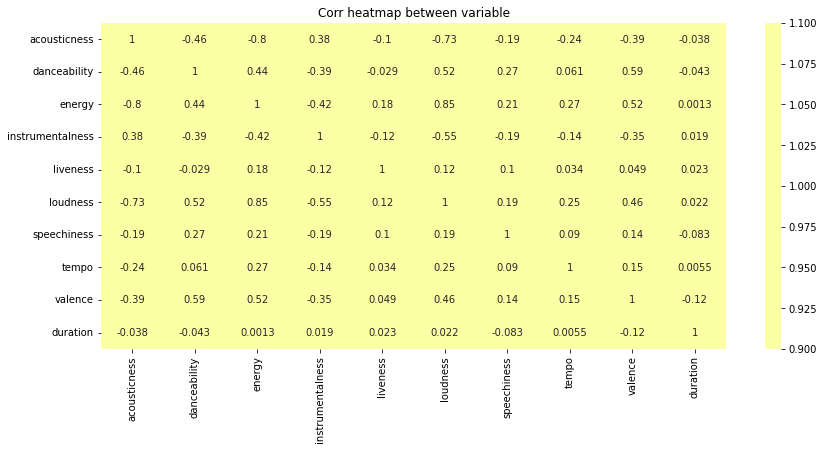

In [26]:
corr_df=df_track.corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,vmin=1,vmax=1,center=0,cmap="inferno")
heatmap.set_title("Corr heatmap between variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

In [27]:
df_track.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,132223.0,0.360332,0.357103,0.000001,0.036200,0.214000,0.697000,0.996
danceability,132223.0,0.546815,0.196096,0.057000,0.414000,0.569000,0.698000,0.987
energy,132223.0,0.558940,0.273538,0.000020,0.358000,0.600000,0.784000,0.999
instrumentalness,132223.0,0.178871,0.327902,0.000000,0.000000,0.000116,0.119000,0.998
liveness,132223.0,0.191804,0.165238,0.009670,0.095600,0.123000,0.232000,1.000
loudness,132223.0,0.787743,0.121180,0.000000,0.746419,0.828337,0.869416,1.000
speechiness,132223.0,0.085532,0.089157,0.022200,0.036600,0.048100,0.088800,0.884
tempo,132223.0,0.491541,0.129455,0.126659,0.387562,0.483594,0.583380,1.000
valence,132223.0,0.444927,0.268816,0.000000,0.212000,0.430000,0.663000,0.992
duration,132223.0,0.476553,0.151500,0.093750,0.385417,0.458333,0.550000,1.000


[Text(0.5, 0, 'acousticness'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'instrumentalness'),
 Text(4.5, 0, 'liveness'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'tempo'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'duration')]

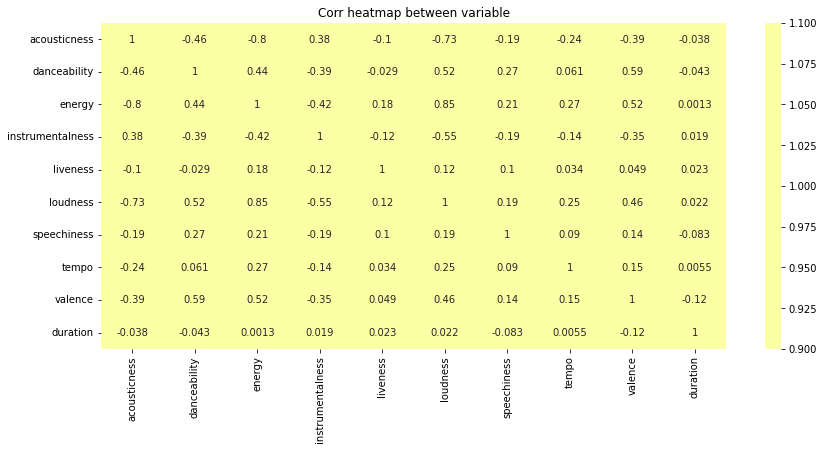

In [28]:
corr_df=df_track.corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,vmin=1,vmax=1,center=0,cmap="inferno")
heatmap.set_title("Corr heatmap between variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

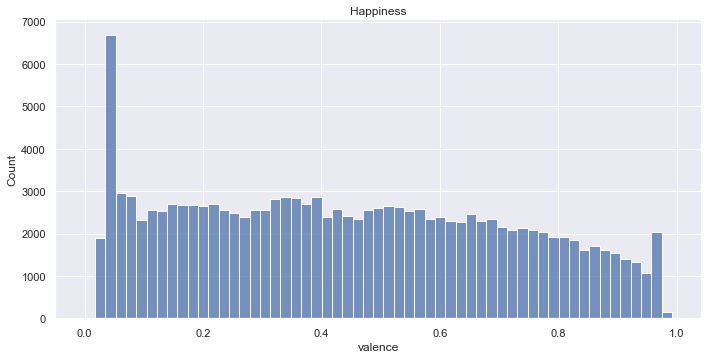

In [78]:
sns.displot(df_track["valence"],aspect=2,height=5,kind="hist").set(title="Happiness") 

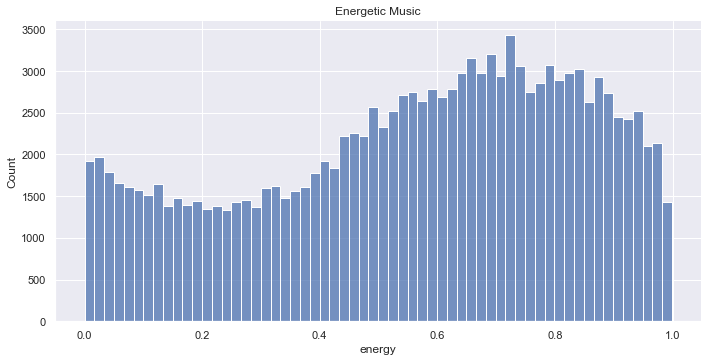

In [77]:
sns.displot(df_track["energy"],aspect=2,height=5,kind="hist").set(title="Energetic Music") 

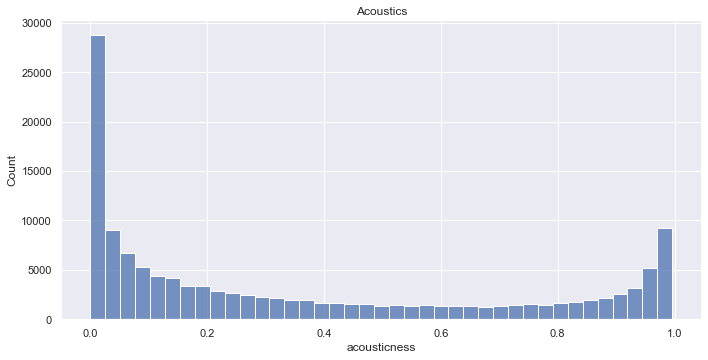

In [60]:
#sns.set(rc={'figure.figsize': [6.4, 4.8] })
sns.set_theme()
sns.displot(df_track["acousticness"],aspect=2,height=5,kind="hist").set(title="Acoustics")

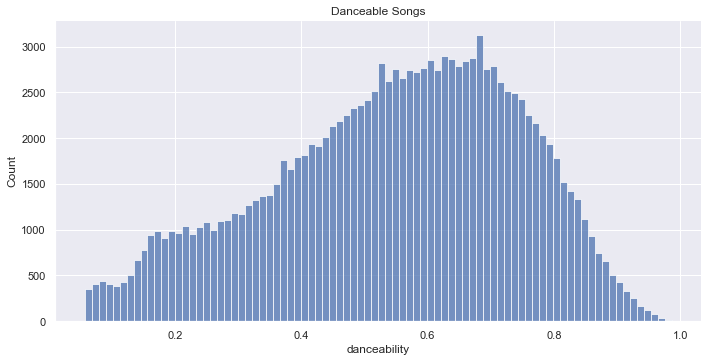

In [264]:
sns.displot(df_track["danceability"],aspect=2,height=5,kind="hist").set(title="Danceable Songs")

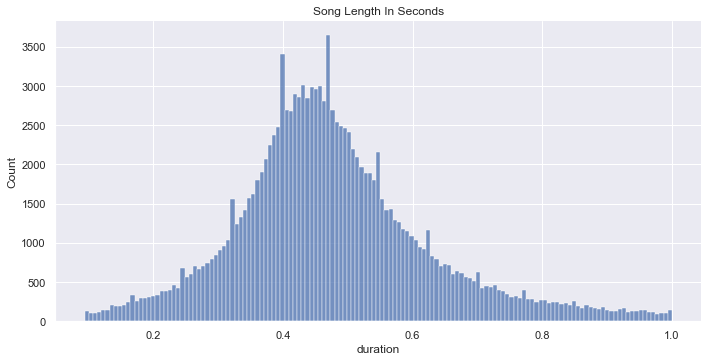

In [256]:
sns.displot(df_track["duration"],aspect=2,height=5,kind="hist").set(title="Song Length In Seconds")

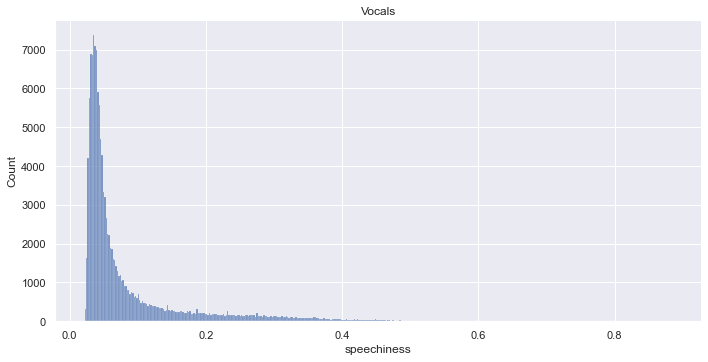

In [257]:
sns.displot(df_track["speechiness"],aspect=2,height=5,kind="hist").set(title="Vocals") #Vocals

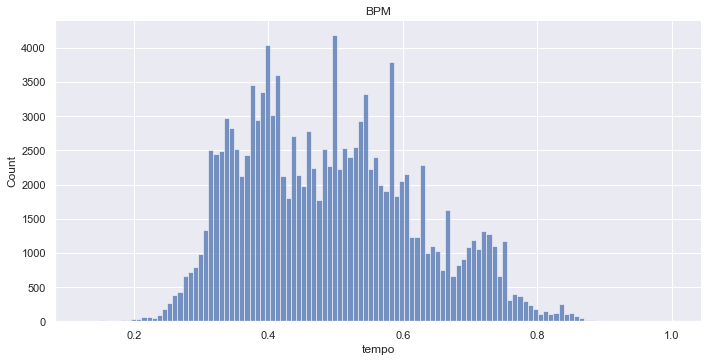

In [258]:
sns.displot(df_track["tempo"],aspect=2,height=5,kind="hist").set(title="BPM") #Speed

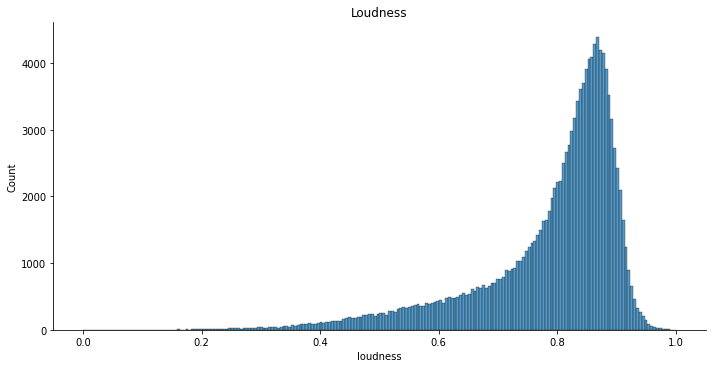

In [220]:
sns.displot(df_track["loudness"],aspect=2,height=5,kind="hist").set(title="Loudness") 

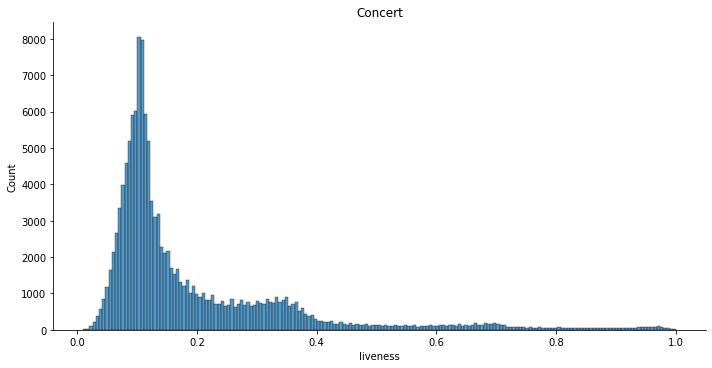

In [221]:
sns.displot(df_track["liveness"],aspect=2,height=5,kind="hist").set(title="Concert") 

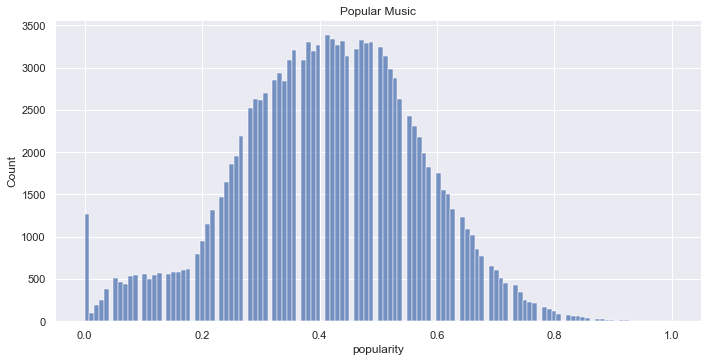

In [259]:
sns.displot(df_track["popularity"],aspect=2,height=5,kind="hist").set(title="Popular Music") 

#rather than assign a fixed value for each button, you should use the random() function to generate a number between
#two sets of values

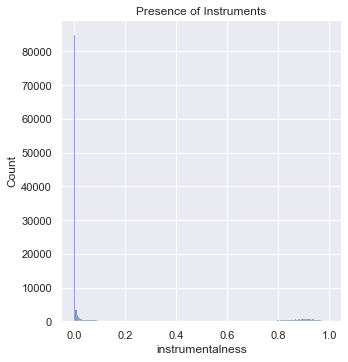

In [262]:
sns.displot(df_track["instrumentalness"],kind="hist").set(title="Presence of Instruments") 

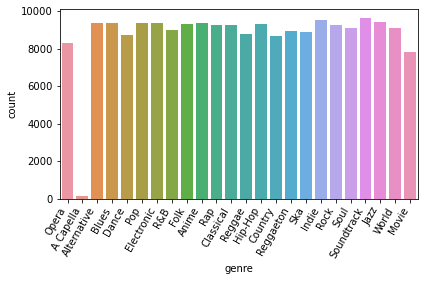

In [174]:
ax = sns.countplot(x="genre", data=df_track)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

#appears to be pretty even